In [2]:
#Step 1 — Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Step 2 — Load the Dataset

df = pd.read_csv("../Data/worldometer_data.csv")
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [4]:
#Step 3 — Check Basic Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [4]:
#Step 4 — Check Missing Values

df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [5]:
#Step 4 — Check Missing Values

df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [6]:
#Step 5 — Drop Rows With Missing TotalCases

df_clean = df.dropna(subset=["TotalCases"]).copy()

In [7]:
#Step 6 — Fill Missing NewCases With 0

df_clean["NewCases"] = df_clean["NewCases"].fillna(0)

In [8]:
#Step 7 — Fill Missing TotalRecovered With 0 (optional)

df_clean["TotalRecovered"] = df_clean["TotalRecovered"].fillna(0)

In [9]:
#Step 8 — Verify Cleaning

df_clean.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases              0
TotalDeaths          21
NewDeaths           206
TotalRecovered        0
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [10]:
#Step 9 — Show Cleaned Dataset

df_clean.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [11]:
#Step 10 — Get Top 10 Countries by TotalCases

top10 = df_clean.nlargest(10, "TotalCases")
top10

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,0.0,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,0.0,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,0.0,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,0.0,28500.0,NaN,0.0,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


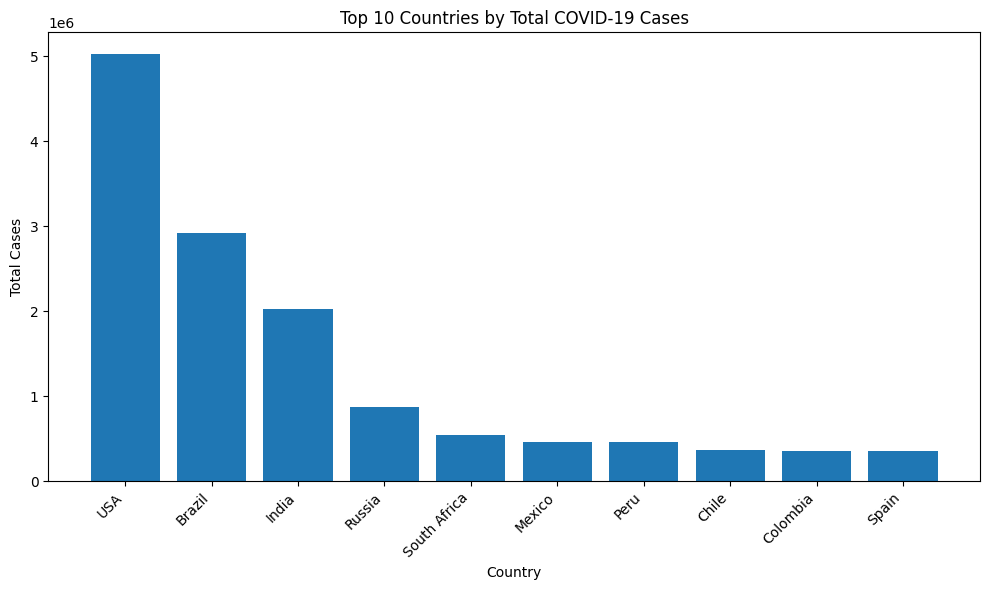

In [12]:
#Step 11 — Plot Top 10 Countries (Bar Chart)

plt.figure(figsize=(10, 6))
plt.bar(top10["Country/Region"], top10["TotalCases"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries by Total COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()

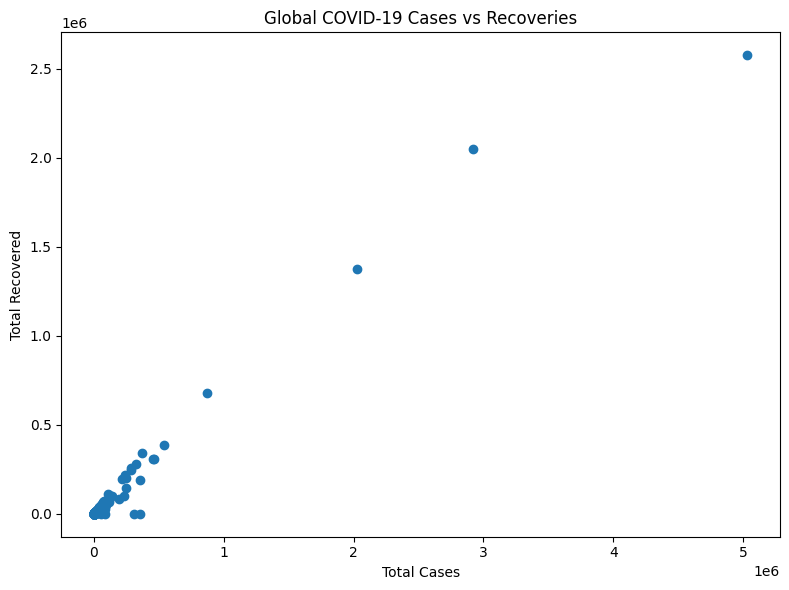

In [13]:
#Step 12 — Scatter Plot: Total Cases vs Total Recovered

plt.figure(figsize=(8, 6))
plt.scatter(df_clean["TotalCases"], df_clean["TotalRecovered"])

plt.title("Global COVID-19 Cases vs Recoveries")
plt.xlabel("Total Cases")
plt.ylabel("Total Recovered")
plt.tight_layout()
plt.show()

In [14]:
#Step 13 — Add Recovery Rate Column

df_clean["RecoveryRate"] = (df_clean["TotalRecovered"] / df_clean["TotalCases"]) * 100

In [15]:
#Step 14 — Add Death Rate Column

df_clean["DeathRate"] = (df_clean["TotalDeaths"] / df_clean["TotalCases"]) * 100

In [16]:
#Step 15 — Show Final Processed Table

df_clean[["Country/Region", "RecoveryRate", "DeathRate"]].head()

,Country/Region,RecoveryRate,DeathRate
0,USA,51.203822,3.235259
1,Brazil,70.183941,3.381042
2,India,68.005228,2.055782
3,Russia,77.573306,1.675204
4,South Africa,71.967208,1.784520
